In [280]:
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt

In [282]:
class Baseline():
    def __init__(self):
        self.targetYear = 2050
        self.startYear = 2021
        self.time = self.targetYear - self.startYear
        self.emissionBase = 100
        self.naturalChange = 3
        #linear path
        self.naturalChangePath = [i * self.naturalChange for i in list(range(0,self.time))]
        self.zero2050 = [i * self.emissionBase/(self.targetYear-self.startYear + 1) for i in list(range(self.time,0,-1))]

        #print(self.naturalChangePath)
        print("Baseline generated with natural increase of " , self.naturalChange)
        
    def createEmissions(self):
        self.df = pd.DataFrame()
        
        self.emissionPath = [self.emissionBase]*self.time
        
        
        self.df['Base'] = self.emissionPath
        self.df['Natural Change'] = self.naturalChangePath
        self.df['Base Change'] = self.df['Base'] + self.df['Natural Change']
        self.df['Zero 2050'] = self.zero2050
        self.df.index = list(range(self.startYear,self.startYear + self.time))
        
        return self.df
    

class Policy():
    def __init__(self,_name, _emission):
        print("Policy generated: ", _name)
        self.emissionReduction = _emission
        self.startYear = 2022
        self.time = 10
        self.name = _name
        self.updateEmissions()
        
    def updateEmissions(self):
        self.emissionReductionPath = [i * self.emissionReduction for i in list(range(0,self.time))]
        self.df = pd.DataFrame({self.name: self.emissionReductionPath},list(range(self.startYear,self.startYear + self.time)))
            
    
class EmissionPathway():
    def __init__(self,_df_baseline):
        self.df = _df_baseline
        self.df['Total Emissions'] = self.df['Base Change']
        #print(self.df)
        
    def updateEmissions(self,policy = 0):
        self.df['Total Emissions'] = self.df['Total Emissions'] + self.df[policy.name].fillna(0)
        
    def includePolicy(self,policy):
        if policy.startYear + policy.time > self.df.index[-1]:
            print('Emission reduction continues further for ', policy.name)
        self.df[policy.name] = policy.df[policy.name]
        self.df.loc[self.df.index >= (policy.startYear + policy.time),policy.name] = policy.df[policy.name].iloc[-1]
        
        
        self.updateEmissions(policy)

In [283]:
base = Baseline()
#print(base)
emissions = base.createEmissions()
#print(emissions)

Baseline generated with natural increase of  3


In [284]:
policyA = Policy('Trains',-10)
policyB = Policy('Bikes', -2)
policyB.startYear = 2025
policyB.time = 30
policyB.updateEmissions()

#policyB

Policy generated:  Trains
Policy generated:  Bikes


In [285]:
first_test = EmissionPathway(base.df)
first_test.includePolicy(policyA)
first_test.includePolicy(policyB)
first_test.df

Emission reduction continues further for  Bikes


,Base,Natural Change,Base Change,Zero 2050,Total Emissions,Trains,Bikes
2021,100,0,100,96.666667,100.0,NaN,NaN
2022,100,3,103,93.333333,103.0,0.0,NaN
2023,100,6,106,90.000000,96.0,-10.0,NaN
2024,100,9,109,86.666667,89.0,-20.0,NaN
2025,100,12,112,83.333333,82.0,-30.0,0.0
2026,100,15,115,80.000000,73.0,-40.0,-2.0
2027,100,18,118,76.666667,64.0,-50.0,-4.0
2028,100,21,121,73.333333,55.0,-60.0,-6.0
2029,100,24,124,70.000000,46.0,-70.0,-8.0
2030,100,27,127,66.666667,37.0,-80.0,-10.0


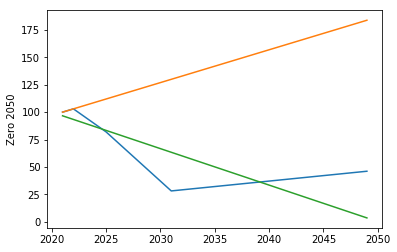

In [286]:
sns.lineplot(data = first_test.df, x = first_test.df.index, y = 'Total Emissions')
sns.lineplot(data = first_test.df, x = first_test.df.index, y = 'Base Change')
sns.lineplot(data = first_test.df, x = first_test.df.index, y = 'Zero 2050')